In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
dataset = pd.read_csv("/media/somit/Local DIsk/BTP/Data Sources/deg-p-13.3/EcoliMG1655/EcoliGenes.csv")
# dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/TyphiLT2/data.csv")
feature=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC']
network1=['Stress','NC']
features=feature+homo
features+=network
features+=network1
# features+=add
print features
df=dataset[features]
# df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df['GC']=df['GC'].fillna(0)
df['GC3s']=df['GC3s'].fillna(0)
df['L_sym']=df['L_sym'].fillna(0)
df['L_aa']=df['L_aa'].fillna(0)
df['Gravy']=df['Gravy'].fillna(0)
df['Aromo']=df['Aromo'].fillna(0)
# df['TC']=df['TC'].fillna(0)
df=df[df.GC!=0]
df=df[df.DC!=0]
# le = preprocessing.LabelEncoder()
# df['#Function']=le.fit_transform(df['#Function'])
df = df.sample(frac=1).reset_index(drop=False)
df.info()
print df.head(5)
features.remove('Essentiality')
print features
X_train=df[features]
Y_train=df['Essentiality']
print X_train.head()

['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 32 columns):
index           3506 non-null int64
CAI             3506 non-null float64
CBI             3506 non-null float64
Fop             3506 non-null float64
GC              3506 non-null float64
Essentiality    3506 non-null int64
GC3s            3506 non-null float64
L_sym           3506 non-null float64
L_aa            3506 non-null float64
Gravy           3506 non-null float64
Aromo           3506 non-null float64
H1              3506 non-null int64
H2              3506 non-null int64
H3              3506 non-null int64
H4              3506 non-null int64
H5              3506 non-null int64
H6              3506 non-null int64
H7              3506 non-null int64
H8              3506 non-null int64
H9              3506 non-null int64
H10             3506 non-null int64
H11             3506 non-null int64
H12             3506 non-null int64
H13             3506 non-null int64
H14        

/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
# X_test = scaler.transform(X_test)
# print X_train[0:5]

Time Taken = 1.942874


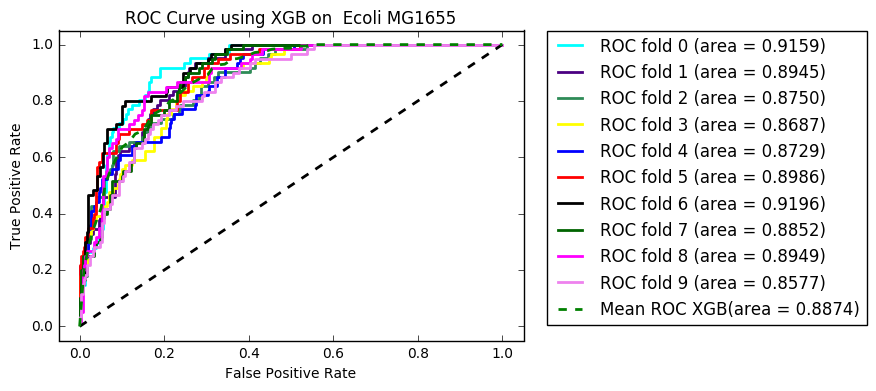

186 MB


In [13]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import timeit


# pca = PCA()
# X_train=pca.fit_transform(X_train)

# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(X_train,Y_train)

# clf = MLPClassifier()
# clf=SVC(C=1,probability=True)

# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()

clf=XGBClassifier()

mean_tpr_xgb = 0.0
mean_fpr_xgb = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0
start = timeit.default_timer()
for (train, test), color in zip(skf.split(X_train,Y_train), colors):
    probas_ = clf.fit(X_train[train],Y_train[train]).predict_proba(X_train[test])      
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:,1])
    mean_tpr_xgb += interp(mean_fpr_xgb, fpr, tpr)
    mean_tpr_xgb[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
stop = timeit.default_timer()  
print "Time Taken = %f" %(stop-start)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr_xgb /= skf.get_n_splits(X_train,Y_train)
mean_tpr_xgb[-1] = 1.0
mean_auc_xgb = auc(mean_fpr_xgb, mean_tpr_xgb)
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='g', linestyle='--',label='Mean ROC XGB(area = %0.4f)' % mean_auc_xgb, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGB on  Ecoli MG1655')
# plt.legend(loc="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

Time Taken =0.176261 


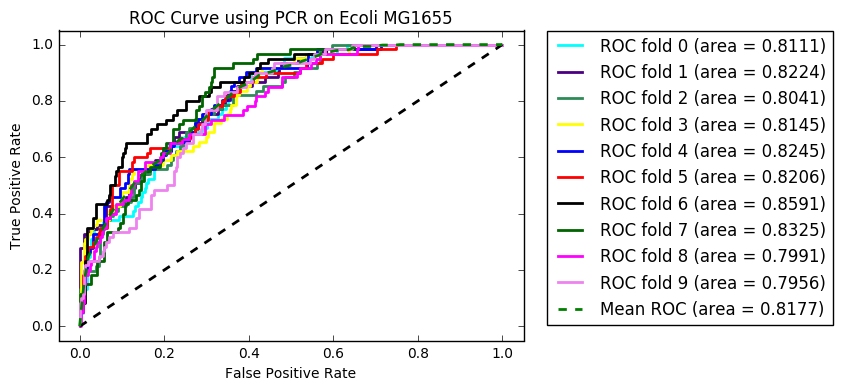

186 MB


In [15]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import timeit

pca = PCA()
xtrain=X_train
ytrain=Y_train
xtrain=pca.fit_transform(xtrain)
clf =LinearRegression()

# clf.fit(X_train,Y_train)
# pred=clf.predict(X_test)
# print pred[0:5]


# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(xtrain,ytrain)

mean_tpr_pcr = 0.0
mean_fpr_pcr = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0

start= timeit.default_timer()

for (train, test), color in zip(skf.split(xtrain,ytrain), colors):
    probas_ = clf.fit(xtrain[train],ytrain[train]).predict(xtrain[test])
            
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(ytrain[test], probas_)
    mean_tpr_pcr += interp(mean_fpr_pcr, fpr, tpr)
    mean_tpr_pcr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
    
stop = timeit.default_timer()
print "Time Taken =%f " %(stop-start)

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr_pcr /= skf.get_n_splits(xtrain,ytrain)
mean_tpr_pcr[-1] = 1.0
mean_auc_pcr = auc(mean_fpr_pcr, mean_tpr_pcr)
plt.plot(mean_fpr_pcr, mean_tpr_pcr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc_pcr, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Ecoli MG1655')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

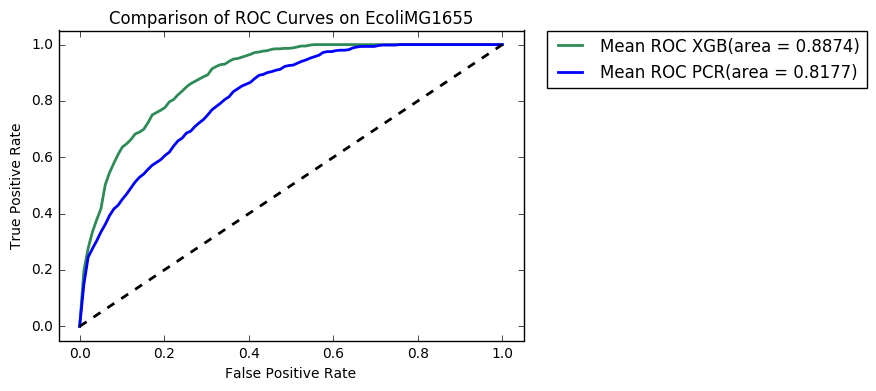

In [16]:
plt.plot(mean_fpr_xgb, mean_tpr_xgb, color='seagreen',label='Mean ROC XGB(area = %0.4f)' % mean_auc_xgb, lw=lw)
plt.plot(mean_fpr_pcr, mean_tpr_pcr, color='blue',label='Mean ROC PCR(area = %0.4f)' % mean_auc_pcr, lw=lw)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='black')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on EcoliMG1655')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [17]:
data = pd.read_csv("/media/somit/Local DIsk/BTP/Data Sources/deg-p-13.3/StreptococcusSanguinis/dataset.csv")
# data= pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
features=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC']
network1=['Stress','NC']
features+=homo
features+=network
features+=network1
# features+=add
print features
df1=data[features]
# df1.info()
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df1['GC']=df1['GC'].fillna(0)
df1['GC3s']=df1['GC3s'].fillna(0)
df1['L_sym']=df1['L_sym'].fillna(0)
df1['L_aa']=df1['L_aa'].fillna(0)
df1['Gravy']=df1['Gravy'].fillna(0)
df1['Aromo']=df1['Aromo'].fillna(0)
# df['TC']=df['TC'].fillna(0)
df1=df1[df1.GC!=0]
df1=df1[df1.DC!=0]
# le = preprocessing.LabelEncoder()
# df1['#Function']=le.fit_transform(df1['#Function'])
df1=df1.sample(frac=1).reset_index(drop=False)
df1.info()
print df1.sample(5)
features.remove('Essentiality')
test_data=df1[features]
test_label=df1['Essentiality']


['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 32 columns):
index           2233 non-null int64
CAI             2233 non-null float64
CBI             2233 non-null float64
Fop             2233 non-null float64
GC              2233 non-null float64
Essentiality    2233 non-null int64
GC3s            2233 non-null float64
L_sym           2233 non-null float64
L_aa            2233 non-null float64
Gravy           2233 non-null float64
Aromo           2233 non-null float64
H1              2233 non-null int64
H2              2233 non-null int64
H3              2233 non-null int64
H4              2233 non-null int64
H5              2233 non-null int64
H6              2233 non-null int64
H7              2233 non-null int64
H8              2233 non-null int64
H9              2233 non-null int64
H10             2233 non-null int64
H11             2233 non-null int64
H12             2233 non-null int64
H13             2233 non-null int64
H14        

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# df1=min_max.fit_transform(df1)


In [18]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(test_data)

# Scale the test set
test_data = scaler.transform(test_data)
# print df1[:1]


Time Taken = 0.242057


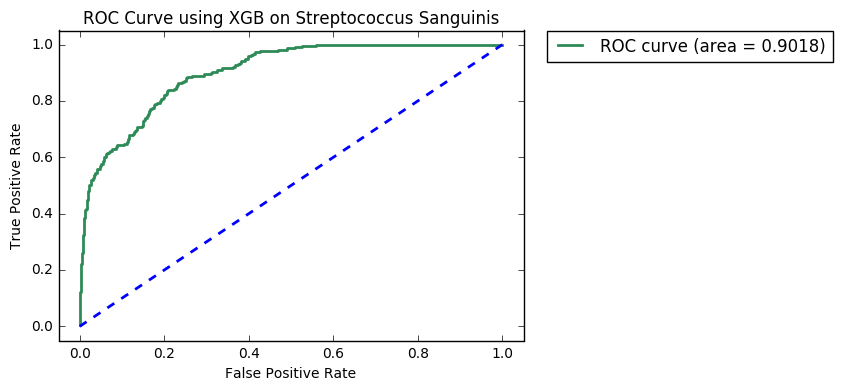

186 MB


In [19]:
clf=XGBClassifier()
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])

lw = 2
start=timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(X_train,Y_train)
probas_=clf.predict_proba(test_data)
stop = timeit.default_timer()
print "Time Taken = %f"%(stop-start)
fpr_xgb, tpr_xgb, thresholds = roc_curve(test_label, probas_[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, lw=lw, color='seagreen',label='ROC curve (area = %0.4f)' % (roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using XGB on Streptococcus Sanguinis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

Time Taken =0.032306


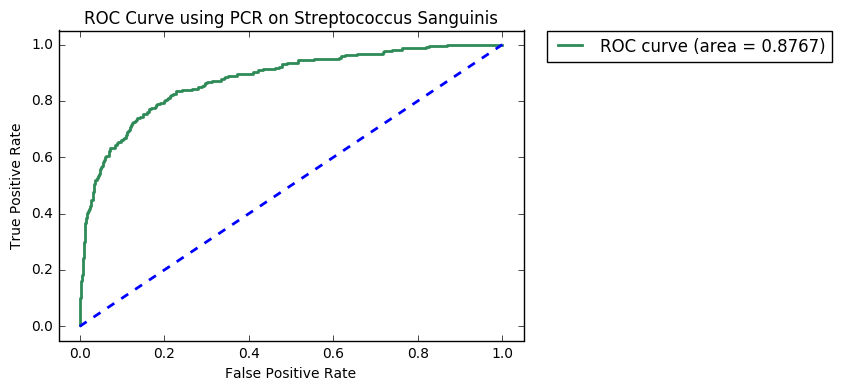

186 MB


In [20]:
# clf=XGBClassifier()
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()

pca = PCA()
test_data_pcr=pca.fit_transform(test_data)
clf=LinearRegression()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])

lw = 2
start = timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(xtrain,ytrain)
probas_=clf.predict(test_data_pcr)
stop = timeit.default_timer()
print "Time Taken =%f"%(stop-start)
fpr_pcr, tpr_pcr, thresholds = roc_curve(test_label, probas_)
roc_auc_pcr = auc(fpr_pcr, tpr_pcr)
plt.plot(fpr_pcr, tpr_pcr, lw=lw, color='seagreen',label='ROC curve (area = %0.4f)' % (roc_auc_pcr))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Streptococcus Sanguinis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"



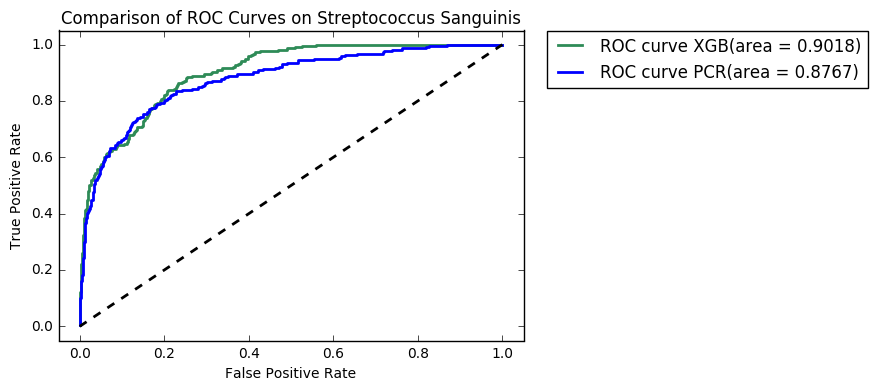

In [21]:
plt.plot(fpr_xgb, tpr_xgb, lw=lw, color='seagreen',label='ROC curve XGB(area = %0.4f)' % (roc_auc_xgb))
plt.plot(fpr_pcr, tpr_pcr, lw=lw, color='blue',label='ROC curve PCR(area = %0.4f)' % (roc_auc_pcr))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on Streptococcus Sanguinis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
# clf=XGBClassifier(max_delta_step=1,max_depth=5,min_child_weight=0.5,gamma=1e-5)
# clf.fit(X_train, Y_train)
# X_test=test_data
# Y_test=test_label
# Y_pred=clf.predict_proba(X_test)
# pred=clf.predict(X_test)
# # print Y_pred
# # print Y_test
# score=clf.score(X_train,Y_train)
# print score*100
# # Y_test=Y_test.reshape(835,1)
# # pred=pred.reshape(835,1)
# accuracy = accuracy_score(Y_test,pred)
# print accuracy * 100
# i=0
# count1=0
# count0=0
# count00=0
# for i in range(len(Y_test)):
#     if pred[i]==1 and Y_test[i]==1:
#         count1+=1
#     if pred[i]==0 and Y_test[i]==0:
#         count00+=1
        
# print "True Positives" ,count1        
# i=0
# count=0
# for i in range(len(Y_test)):
#     if Y_test[i]==1:
#         count+=1
#     else:
#         count0+=1
# print "Total positives",count
# print "True Negatives",count00
# print "Total negatives" ,count0

# # Compute ROC curve and ROC area for each class
# fpr, tpr,_ = roc_curve(Y_test,Y_pred[:,1])
# roc_auc = auc(fpr,tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.4f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

In [ ]:
# from sklearn import cross_validation
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
# from scipy import interp
# from itertools import cycle
# from sklearn.neural_network import MLPClassifier
# from sklearn.decomposition import PCA
# import timeit


# # pca = PCA()
# # X_train=pca.fit_transform(X_train)

# # print len(X_train)
# # print Y_train.shape

# #kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
# skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
# #kf=KFold(n_splits=10,shuffle=True,random_state=23)
# skf.get_n_splits(X_train,Y_train)

# # clf = MLPClassifier()
# clf=SVC(probability=True)
# #clf=XGBClassifier()
# # clf=RandomForestClassifier()
# # clf=DecisionTreeClassifier()
# # clf=KNeighborsClassifier(n_neighbors = 25)
# # clf=GaussianNB()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
# lw = 2

# i = 0
# start = timeit.default_timer()


# for (train, test), color in zip(skf.split(X_train,Y_train), colors):
#     probas_ = clf.fit(X_train[train],Y_train[train]).predict_proba(X_train[test])      
#     # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(Y_train[test], probas_[:,1])
#     mean_tpr += interp(mean_fpr, fpr, tpr)
#     mean_tpr[0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
#     i += 1
    

# stop = timeit.default_timer()  
# print "Time Taken = %f" %(stop-start)
# plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

# mean_tpr /= skf.get_n_splits(X_train,Y_train)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic using SVM for Ecoli')
# # plt.legend(loc="right")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()
# # for train,test in skf.split(X_train,Y_train):
# #     x_train, x_test = X_train.iloc[train], X_train.iloc[test]
# #     y_train, y_test = Y_train.iloc[train], Y_train.iloc[test]

    

In [ ]:
# clf=SVC(probability=True)
# clf.fit(X_train,Y_train)
# Y_pred=clf.predict_proba(X_test)
# #print Y_score
# # acc_svc = clf.score(X_train, Y_train) * 100
# # print acc_svc
# # acc=accuracy_score(Y_test,Y_pred)
# # print acc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve using SVM for Sanguinis')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

In [ ]:
# clf=RandomForestClassifier()
# clf.fit(X_train,Y_train)
# Y_pred=clf.predict_proba(X_test)
# acc_svc = round(clf.score(X_test, Y_test) * 100, 2)
# print acc_svc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict_proba(X_test)
# # acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
# # acc_knn
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict_proba(X_test)
# # acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
# # acc_gaussian
# fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
# acc_perceptron
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # Linear SVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
# acc_linear_svc = round(linear_svc.score(X_test, Y_test)* 100, 2)
# acc_linear_svc
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # Stochastic Gradient Descent

# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
# acc_sgd
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # Decision Tree
# clf= DecisionTreeClassifier()
# clf.fit(X_train, Y_train)
# Y_pred = clf.predict(X_test)
# acc=accuracy_score(Y_test,Y_pred)
# print acc*100
# print Y_pred.shape
# #print Y_score.shape
# fpr, tpr,_ = roc_curve(Y_test, Y_pred)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# # roc_auc_score(Y_test,Y_score)
# # roc_auc_score
# acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
# acc=accuracy_score(Y_test,Y_pred)
# print acc*100
# print acc_decision_tree